<a href="https://colab.research.google.com/github/williamlidberg/Analyses-of-Environmental-Data-2/blob/main/modules/module_3/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling with Python
Data is generated from multiple parts of society, but no one agrees on how to properly store data. It is often messy and semi-structured, and for any more extensive projects, you will spend most of the time acquiring, preparing and cleaning the data. Therefore the aim of this module is to introduce you to some tools and methods to handle datasets of different types, you will work on both tabular data, vector data and image data.


All data using in this course will be "real" data. This means that is not always ready for analysis. For part of this excercise you will use data from the Swedish agency for Digital Goverment. https://www.dataportal.se/en It is still under construction but spend some time to poke around in there and see if you can find some inspiration for your future Master thesis.


# Download data
Students and researchers in Sweden have access to most of Swedens geographical data. You can use the [GET tool](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiX39fm752EAxX-GRAIHX1BCvYQFnoECBIQAQ&url=https%3A%2F%2Fmaps.slu.se%2F&usg=AOvVaw1f8lXxGJcMoJQd2BaJLK0N&opi=89978449) to select data, draw a square on a map and then download the data.

### Task 1
Download buildings from your favorite part of Sweden using the GET tool. Send me an mail if you fail to log in. you will need to download data from GET in module 4 as well so make sure you get this to work. On a scale between 1 to 5, how hard was it to download the data?

### Useful Linux commands
Linux is the underlying kernel of the python envrionment so I wanted to introduce you to some usefull Linux commands that you can use in the terminal. If you want to use these commands in a notebook you need to use the ! sign infront.

Linux commands are available in google colab, but if you are using anaconda on windows, you can install some basic Linux commands with conda install m2-base. Yet another reason to use Linux on your workstation. [Ubuntu](https://ubuntu.com/tutorials/install-ubuntu-desktop) is a good option if you have an old computer laying around.


### Download data with git clone
Small datasets can be stored in github repositories. There are about 1000 images of impact creaters on the moon in this repository: https://github.com/williamlidberg/Unet-tutorial

The flollowing command clones the repository including the data.

In [ ]:
!git clone https://github.com/williamlidberg/Unet-tutorial.git

Cloning into 'Unet-tutorial'...
remote: Enumerating objects: 2211, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 2211 (delta 38), reused 18 (delta 3), pack-reused 2132
Receiving objects: 100% (2211/2211), 165.78 MiB | 29.92 MiB/s, done.
Resolving deltas: 100% (124/124), done.


It's always a good idea to inspect your data so lets plot some images using matplotlib

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def plot_image_grid(image_dir, num_images=4, grid_size=(2, 2)):
    image_files = [file for file in os.listdir(image_dir) if file.endswith(".png")][:num_images]

    fig, axes = plt.subplots(*grid_size, figsize=(8, 8))

    for i, image_file in enumerate(image_files):
        img = Image.open(os.path.join(image_dir, image_file)).convert('L')  # Convert to grayscale
        row, col = divmod(i, grid_size[1])

        axes[row, col].imshow(img, cmap='gray')
        axes[row, col].axis("off")
        axes[row, col].set_title(image_file)

    plt.tight_layout()
    plt.show()

# Example usage:
image_directory = "/content/Unet-tutorial/craters_1000_samples/train/images"
plot_image_grid(image_directory, num_images=4, grid_size=(2, 2))


FileNotFoundError: [Errno 2] No such file or directory: '/content/Unet-tutorial/craters_1000_samples/train/images'

The data also contain images where each pixel is labeled 1 for impact craters and 0 for background. Lets quickly count the number of pixels labeled as impact crates across the dataset. Lets say we want to plot the distribution of the area of each image covered by impact craters.

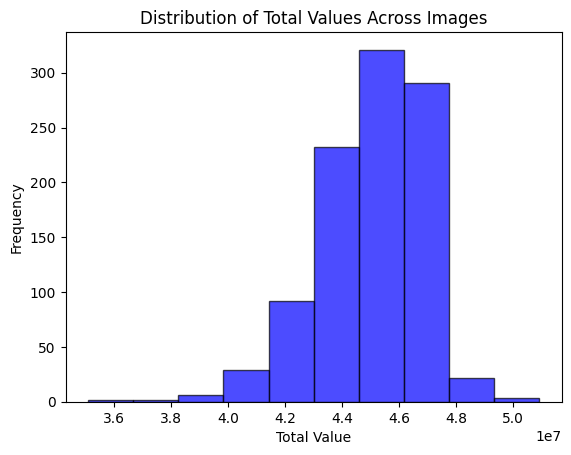

In [ ]:
import numpy as np
import imageio.v2 as imageio
sums = []

label_directory = '/content/Unet-tutorial/craters_1000_samples/train/images'

for image in os.listdir(label_directory):
  image_with_path = os.path.join(label_directory, image)
  numpy_array = imageio.imread(image_with_path)
  sums.append(np.sum(numpy_array))

plt.hist(sums, bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Total Values Across Images')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()


### Task 2
Clone this repository https://github.com/williamlidberg/Geographical-Intelligence and use numpy to find the maximum value in the digital elevation model stored under https://github.com/williamlidberg/Geographical-Intelligence/tree/main/data/rasters/dem


### Download data with wget
wget can be used to download files from the internet using a link and a target directory. The -P after the link indicates the path where the file should be stored, in this case under /content/sample_data/

In [ ]:
!wget https://geodata.naturvardsverket.se/nedladdning/diken/Diken_Sverige/Diken_lansvis/Diken_K.zip -P /content/sample_data/


--2024-02-08 11:38:30--  https://geodata.naturvardsverket.se/nedladdning/diken/Diken_Sverige/Diken_lansvis/Diken_K.zip
Resolving geodata.naturvardsverket.se (geodata.naturvardsverket.se)... 192.71.189.28
Connecting to geodata.naturvardsverket.se (geodata.naturvardsverket.se)|192.71.189.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53845153 (51M) [application/zip]
Saving to: ‘/content/sample_data/Diken_K.zip.1’

Diken_K.zip.1       100%[===================>]  51.35M  6.53MB/s    in 34s     

2024-02-08 11:39:05 (1.53 MB/s) - ‘/content/sample_data/Diken_K.zip.1’ saved [53845153/53845153]



### unzip
Unzip can be used to unpack ziped data. The flag -o means that the data will be overwritten if you already have a file with the same name.

In [ ]:
!unzip -o /content/sample_data/Diken_K.zip -d /content/

Archive:  /content/sample_data/Diken_K.zip
  inflating: /content/Diken_K.gpkg   


.gpkg is a geopackage which is an open, standards-based, file format for storing geospatial data. It is designed to be a single-file container that can hold various types of geographic data, including vector features, raster images, and attribute tables. There has been a push in Sweden to move away from shapefiles to geopackage. Python packages such as geopandas, fiona and gdal can be used to open geopackage files. We will dive deeper into geopandas in module 6 so for now lets just open the geopackage.

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd
path_to_geopackage = '/content/Diken_K.gpkg'
data = gpd.read_file(path_to_geopackage)
data

,OBJECTID,Dike_ID,Typ,Typ_2_3_4,Langd_m,Shape_Length,geometry
0,1,1,Skogsdike,Övrigt dike,122.475113,122.475113,"LINESTRING (475852.500 6207476.500, 475853.214..."
1,2,2,Skogsdike,,2.414214,2.414214,"LINESTRING (475843.500 6207474.500, 475842.500..."
2,3,3,Skogsdike,,22.740989,22.740989,"LINESTRING (476071.500 6207424.500, 476074.500..."
3,4,4,Skogsdike,,3.000000,3.000000,"LINESTRING (476095.500 6207419.500, 476097.000..."
4,5,5,Skogsdike,Övrigt dike,90.789064,90.789064,"LINESTRING (476025.500 6207416.500, 476025.500..."
...,...,...,...,...,...,...,...
282952,282953,282953,Skogsdike,,12.846602,12.846602,"LINESTRING (535609.500 6260303.500, 535607.786..."
282953,282954,282954,Skogsdike,Övrigt dike,94.273362,94.273362,"LINESTRING (535000.500 6260083.500, 535001.357..."
282954,282955,282955,Skogsdike,Övrigt dike,129.007853,129.007853,"LINESTRING (535145.500 6260014.500, 535142.500..."
282955,282956,282956,Skogsdike,,188.657746,188.657746,"LINESTRING (535335.500 6260600.500, 535338.500..."


<Axes: >

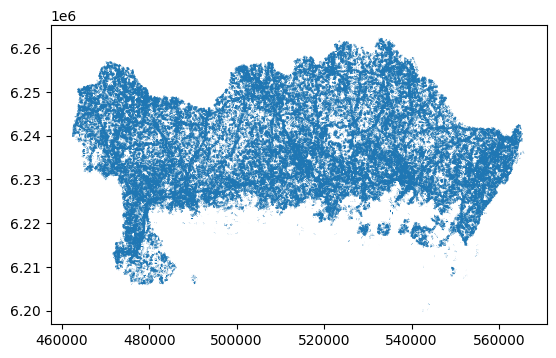

In [ ]:
data.plot()

### Task 3
Select another region of Sweden here and download it. https://geodata.naturvardsverket.se/nedladdning/diken/Diken_Sverige/Diken_lansvis/?C=N;O=A

Awnser the question: What is the most common type of ditches in that area? The column with ditch type is named "Typ".

### Download data with urllib
urllib is a python package that collects several modules for working with URLs


In [5]:
from urllib.request import urlretrieve
url = ('https://opendata.umea.se/api/v2/catalog/datasets/vaxthusgasutslapp_umea/exports/csv')
filename = '/content/sample_data/vaxthusgasutslapp_umea.csv' # you need to adjust this path on your own computer if you are using anaconda.

urlretrieve(url, filename)

('/content/sample_data/vaxthusgasutslapp_umea.csv',
 <http.client.HTTPMessage at 0x7fe02c90f7f0>)

In google colab the data is stored under '/content/sample_data/' but you need to specify a path on your own machine. R has built in functionality to read csv-files but in Python we need to use a library like pandas. Here we will import pandas as pd and then read the csv file using the command pd.read_csv()

# Tabular data
Tabular data refers to information organized in a table. Each row represents a single observation, entity, or record in the dataset. Each column represents a specific attribute, variable, or field associated with the observations. The R community sometimes refers to this as tidy data.

In [ ]:
import pandas as pd
ghg_emissions = pd.read_csv('/content/sample_data/vaxthusgasutslapp_umea.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 60, saw 2


Something is off with this file. You can download it and try to open it in exceel or notepad to see what could be the issue but a common problem with CSV files is how the columns are separated. Especcially Swedish data where , is used instead of . for numbers. However, just like with R you can specify the separator in pandas. In this case we can try with ';'

In [6]:
import pandas as pd
ghg_emissions = pd.read_csv('/content/sample_data/vaxthusgasutslapp_umea.csv', sep=';')
ghg_emissions

,huvudsektor,undersektor,artal,varde_co2e
0,Alla,Alla undersektorer,1990,4.743488e+05
1,Alla,Alla undersektorer,2000,4.517868e+05
2,Alla,Alla undersektorer,2005,4.967645e+05
3,Alla,Alla undersektorer,2010,4.502907e+05
4,Alla,Alla undersektorer,2017,3.956145e+05
...,...,...,...,...
578,Avfall (inkl.avlopp),Krematorier och förbranning av farligt avfall,2021,-4.783723e-12
579,Avfall (inkl.avlopp),Oavsiktliga bränder,2005,0.000000e+00
580,Avfall (inkl.avlopp),Oavsiktliga bränder,2016,0.000000e+00
581,Avfall (inkl.avlopp),Övrig avfallshantering,1990,0.000000e+00


Note that these columns are in Swedish so lets rename them to something more useful using the rename command. It takes the dataframe as input and then you pair up the old name with the new name seperated by :

In [7]:
ghg_emissions.rename(columns={'huvudsektor': 'MainSector',
                   'undersektor': 'SubSector',
                   'artal': 'Year',
                   'varde_co2e': 'CO2EmissionValue'}, inplace=True)
ghg_emissions

,MainSector,SubSector,Year,CO2EmissionValue
0,Alla,Alla undersektorer,1990,4.743488e+05
1,Alla,Alla undersektorer,2000,4.517868e+05
2,Alla,Alla undersektorer,2005,4.967645e+05
3,Alla,Alla undersektorer,2010,4.502907e+05
4,Alla,Alla undersektorer,2017,3.956145e+05
...,...,...,...,...
578,Avfall (inkl.avlopp),Krematorier och förbranning av farligt avfall,2021,-4.783723e-12
579,Avfall (inkl.avlopp),Oavsiktliga bränder,2005,0.000000e+00
580,Avfall (inkl.avlopp),Oavsiktliga bränder,2016,0.000000e+00
581,Avfall (inkl.avlopp),Övrig avfallshantering,1990,0.000000e+00


Now the column headers are in English but the content is still in Swedish. This can be a bit more cumbersum to fix but here is a demonstration of how you can replace Personbilar with cars in the Subsector column.

In [8]:
ghg_emissions['SubSector'] = ghg_emissions['SubSector'].replace('Personbilar', 'Cars')
ghg_emissions

,MainSector,SubSector,Year,CO2EmissionValue
0,Alla,Alla undersektorer,1990,4.743488e+05
1,Alla,Alla undersektorer,2000,4.517868e+05
2,Alla,Alla undersektorer,2005,4.967645e+05
3,Alla,Alla undersektorer,2010,4.502907e+05
4,Alla,Alla undersektorer,2017,3.956145e+05
...,...,...,...,...
578,Avfall (inkl.avlopp),Krematorier och förbranning av farligt avfall,2021,-4.783723e-12
579,Avfall (inkl.avlopp),Oavsiktliga bränder,2005,0.000000e+00
580,Avfall (inkl.avlopp),Oavsiktliga bränder,2016,0.000000e+00
581,Avfall (inkl.avlopp),Övrig avfallshantering,1990,0.000000e+00


For a quick overview of a pandas dataframe you can use the command describe(). \

If the DataFrame contains numerical data, the description contains these information for each column:

* count - The number of not-empty values.
* mean - The average (mean) value.
* std - The standard deviation.
* min - the minimum value.
* 25% - The 25% percentile.
* 50% - The 50% percentile.
* 75% - The 75% percentile.
* max - the maximum value.

In [ ]:
ghg_emissions.describe()

,Year,CO2EmissionValue
count,583.000000,5.830000e+02
mean,2011.909091,1.554458e+04
std,9.354436,5.868998e+04
min,1990.000000,-4.783723e-12
25%,2005.000000,1.311714e+02
50%,2016.000000,9.404116e+02
75%,2019.000000,5.833831e+03
max,2021.000000,4.967645e+05


While this is usefull it does not always make sence. For example, we might want to have a summary per SubSector or year instead of all of them combined. This is where the command groupby shines. \

Group by 'MainSector' and calculate the sum of 'CO2EmissionValue'




In [ ]:
summarized_df = ghg_emissions.groupby(['MainSector'])['CO2EmissionValue'].sum().reset_index()
summarized_df

,MainSector,CO2EmissionValue
0,Alla,4.531156e+06
1,Arbetsmaskiner,3.619312e+05
2,Avfall (inkl.avlopp),8.900607e+04
3,Egen uppärmning av bostäder och lokaler,1.342859e+05
4,El och fjärrvärme,9.337582e+05
5,Industri (energi + processer),5.760111e+05
6,Jordbruk,2.953773e+05
7,Produktanvändning (inkl. lösningsmedel),1.774307e+05
8,Transporter,1.963534e+06


Applying reset_index() will move the grouped columns into a new dataframe with new columns. This can be useful in many cases, especially if you want to work with the result as a regular DataFrame and not deal with a multi-level index.

### Task 4
What was the total Co2 Emission in Umeå in 2017?

# Plotting data with Python
R and ggplot are excellent for making beautiful plots and I sometimes go back to R for my figures. However, there are some nice tools for visualising data in Python as well. Matplotlib and seaborn is a nice combination of packages.

In [ ]:
!pip install matplotlib
!pip install seaborn

Lets use the previously downloaded data ghg_emissions to make some plots. We can start by summarizing the emissions by year and create a barplot

In [ ]:
yearly_emissions = ghg_emissions.groupby(['Year'])['CO2EmissionValue'].sum().reset_index()

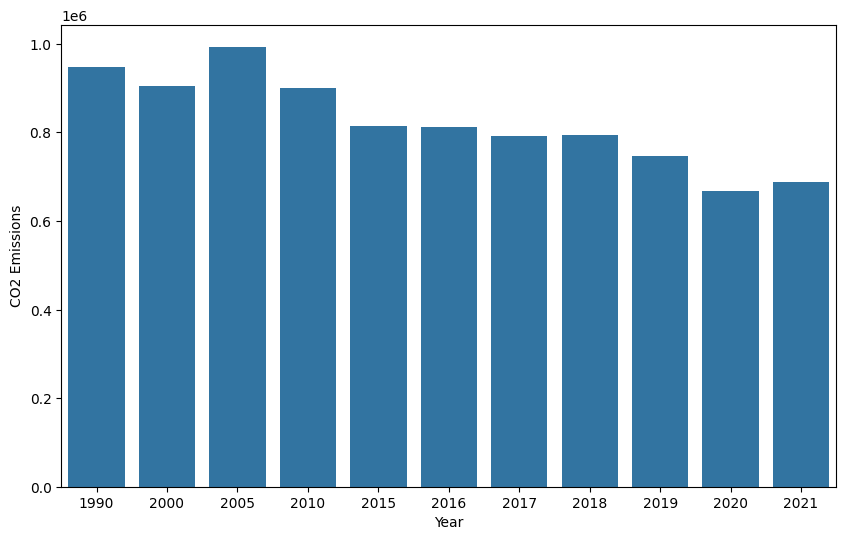

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='Year', y='CO2EmissionValue', data=yearly_emissions) # note that we use sns.barplot
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.show()

If you want to group by multiple columns, you can pass a list of column names to the groupby method. Here's an example:

In [ ]:
yearly_emissions = ghg_emissions.groupby(['Year', 'SubSector'])['CO2EmissionValue'].sum().reset_index()
yearly_emissions

,Year,SubSector,CO2EmissionValue
0,1990,Alla undersektorer,619002.484551
1,1990,Användning av fluorerade gaser,158.741708
2,1990,Användning av konstgödsel,2177.084133
3,1990,Avdunsting fran vägfordon,0.000000
4,1990,Avfallsdeponier,14854.938901
...,...,...,...
556,2021,inrikes civil sjöfart (inkl privata fritidsbåtar),8545.011525
557,2021,Övrig avfallshantering,0.000000
558,2021,Övrig produktanvändning,0.000000
559,2021,"Övrigt (flygplatser, hamnar, m.m.)",5823.593737


You can go even further and filter the dataframe for a specific value or class in the attribute table. Here is an example of how to find the emissions over time but only for the jordbruk (agriculture)

In [ ]:
column = 'Jordbruk'
agriculture_emissions = ghg_emissions.loc[ghg_emissions['MainSector'] == column]

In [ ]:
agriculture_emissions

,MainSector,SubSector,Year,CO2EmissionValue
7,Transporter,Cars,2000,105374.826596
8,Transporter,Cars,2015,98539.076731
9,Transporter,Cars,2016,96419.756262
10,Transporter,Cars,2018,97655.415473
11,Transporter,Lätta lastbilar,1990,7731.756974
...,...,...,...,...
425,Transporter,inrikes civil sjöfart (inkl privata fritidsbåtar),2021,8545.011525
426,Transporter,Inrikes flygtrafik,2019,16591.253908
427,Transporter,Järnväg,2005,243.631584
428,Transporter,Järnväg,2018,167.133758


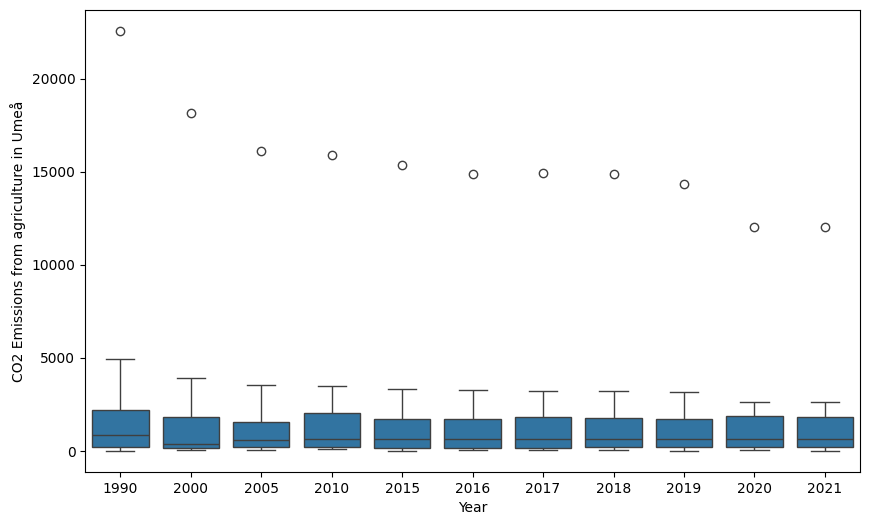

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x='Year', y='CO2EmissionValue', data=agriculture_emissions) # note that we use sns.boxplot
plt.xlabel('Year')
plt.ylabel('CO2 Emissions from agriculture in Umeå')
plt.show()

Filtering dataframes is a very powerful tool and you can filter with multiple conditions. For example you can select emissions from agriculture between different years.

In [ ]:
agriculture_subset = ghg_emissions.loc[(ghg_emissions['Year'] >= 2015) & (ghg_emissions['Year'] <= 2020)]

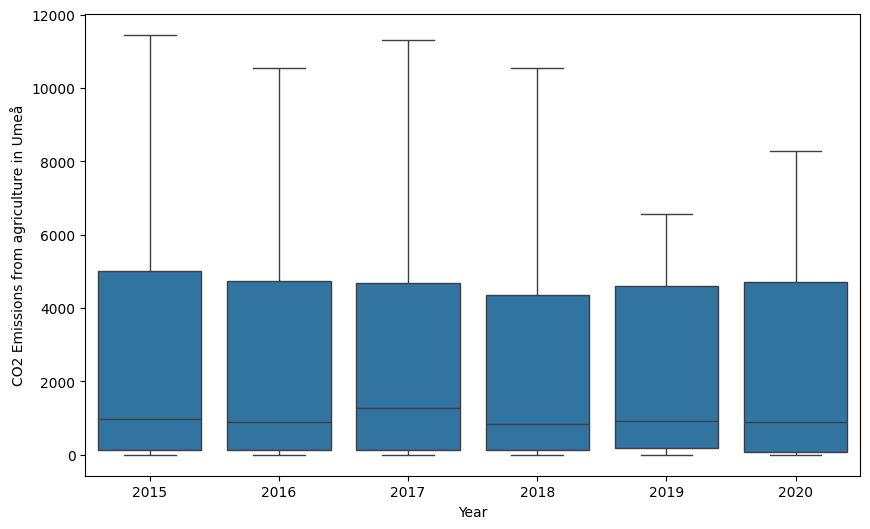

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x='Year', y='CO2EmissionValue', data=agriculture_subset, showfliers=False) # Note that we exluded outliers this time
plt.xlabel('Year')
plt.ylabel('CO2 Emissions from agriculture in Umeå')
plt.show()

We cannot cover everything pandas can do here but one final example is to exclude rows in the dataframe. In this case we will exclude the main sector alla. This operation is called with != in python. e.i not equal.

In [16]:
column = 'Alla'
emissions = ghg_emissions.loc[ghg_emissions['MainSector'] != column]

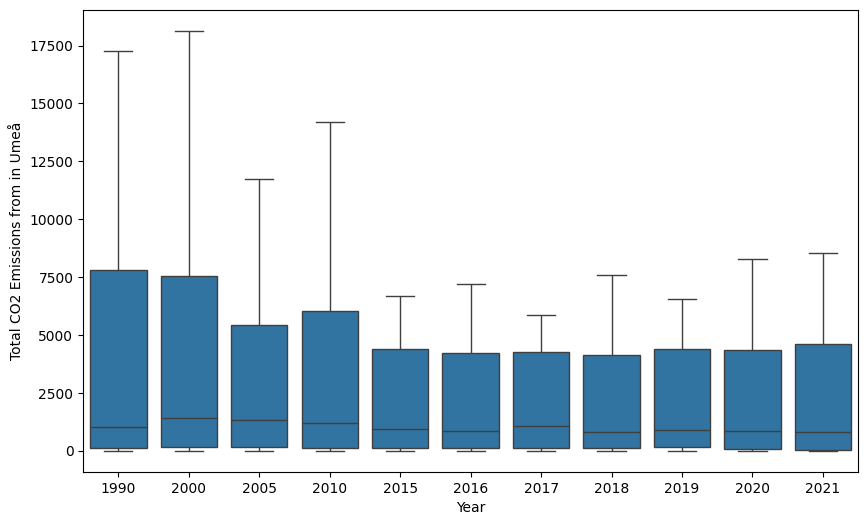

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x='Year', y='CO2EmissionValue', data=emissions, showfliers=False) # Note that we exluded outliers this time
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions from in Umeå')
plt.show()

### Task 5
Make a boxplot of the Co2 emissions from the transportation sector (Transporter) in Umeå between 2015 and 2020 but exclude the emissions from busses (Bussar).

## Animated plots
If you really want to impress your friends you can flex with animated plots. Some of you might have heard of Hans Rosling and gapminder. Lets start with an example using gapminder data and then make an animation with our data.

In [2]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.0 MB/s eta 0:00:00


df = px.data.gapminder() pulls the data from gampinder

In [47]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

First start by removing the column 'Alla' from the dataset and then sort the dataset by year.

In [ ]:
column = 'Alla'
emissions = ghg_emissions.loc[ghg_emissions['MainSector'] != column]
emissions_sorted = emissions.sort_values(by='Year')

Finally we can plot the data as an animation of emissions over time.

In [57]:
import plotly.express as px

df = px.data.gapminder()

fig = px.bar(emissions_sorted, x="MainSector", y="CO2EmissionValue", color="MainSector",
  animation_frame="Year", animation_group="MainSector", range_y=[0,100000])
fig.show()

### Task 6
Change the above animation to a boxplot instead of a barplot and set the theme to darkmode to make it extra cool. Reminder, its ok to use LLMs in this course.